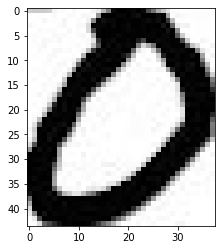

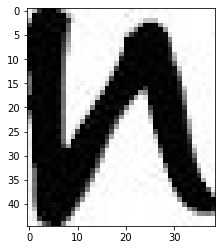

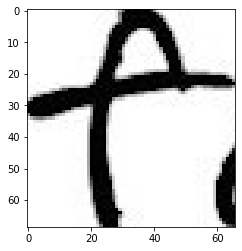

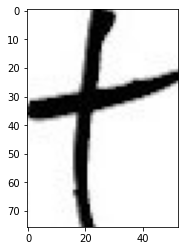

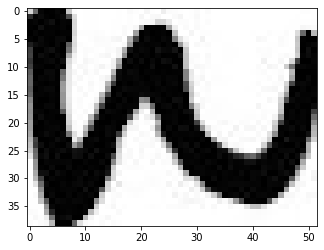

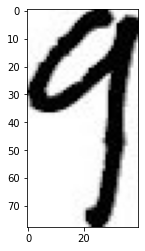

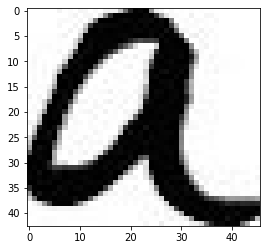

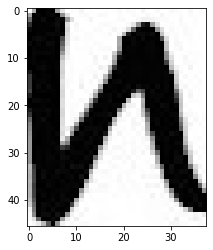

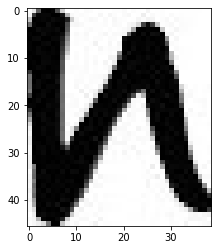

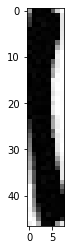

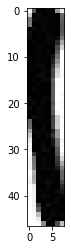

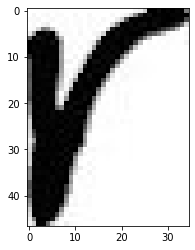

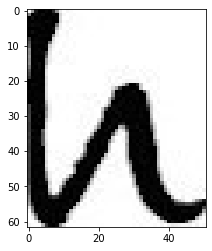

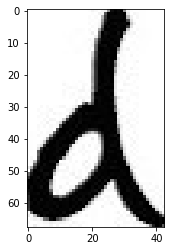

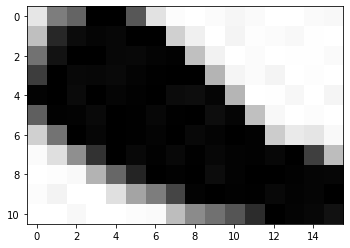

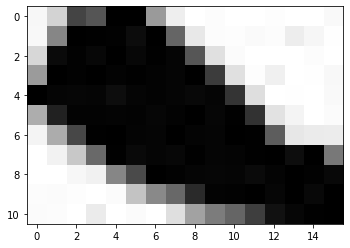

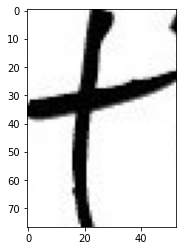

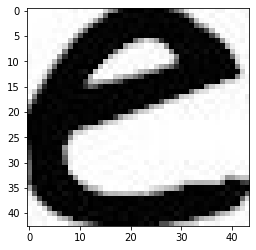

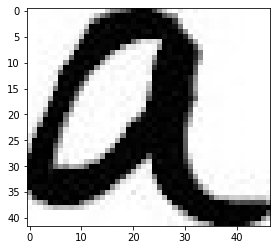

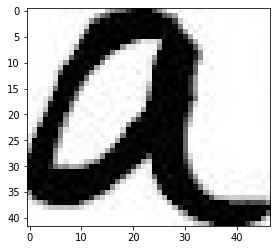

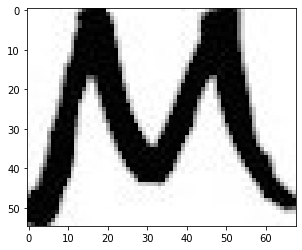

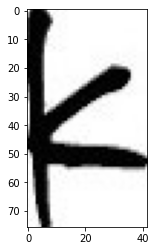

In [7]:
import cv2
import imutils
from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/MyDrive/2022-1/IA/texto.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY_INV)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))
mask = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)
conts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
conts = imutils.grab_contours(conts)
for cntr in conts:
    x,y,w,h = cv2.boundingRect(cntr)
    cropped = img[y:y+h, x:x+w]
    plt.imshow(cropped)
    plt.show()
